## Collaborative Filtering based Recommendation System

In [1]:
#importing the required libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [125]:
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import requests

## Memory Based Approach --(Item-Item Based)

In [200]:
df=pd.read_csv('Preprocessed data.csv')
books_df=pd.read_csv('books_cleaned.csv')
ratings=pd.read_csv('ratings_cleaned.csv')

### KNN Based Algorithm

In [201]:
# we kept running into memory issues, so decided to reduce some data by filtering things out
# focussing on users with more than 11 ratings and top 10% most frequently rated books
required_ratings = 11

user = df['User-ID'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['User-ID'].isin(user_list)]

print('Number of users with ratings more than 11 are: {}'.format(filter_df.shape[0]))

Number of users with ratings more than 11 are: 679883


In [202]:
# top 10% most frequently rated books
required = len(filter_df.ISBN.unique()) * 0.1

user_list = filter_df['Book-Title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['Book-Title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 416153


In [203]:
# shape of final dataset
filter_df.shape

(416153, 11)

In [204]:
# creating a pivot table
table = filter_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
table

User-ID,8,242,243,254,383,388,408,424,446,487,...,278390,278418,278522,278535,278554,278563,278582,278633,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Zone (Star Trek The Next Generation, Book 48)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\O\"" Is for Outlaw""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
# filling null values
table.fillna(0, inplace=True)
table

User-ID,8,242,243,254,383,388,408,424,446,487,...,278390,278418,278522,278535,278554,278563,278582,278633,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Zone (Star Trek The Next Generation, Book 48)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<13336x9143 sparse matrix of type '<class 'numpy.float64'>'
	with 412342 stored elements in Compressed Sparse Row format>

In [71]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='euclidean',algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [166]:
# function to get recommendations

def get_recommendations(name, n):
    # getting book id
    book_id= np.where(table.index==name)[0][0]
    sugg=[]
    dist=[]
    # distances and suggestions based on similarity
    distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
    d=list(distances[0])
    suggestions = suggestions.flatten().tolist()
    for i in range(len(suggestions)):
        # if book is same as input
        if i==0:
            continue
        else:
            sugg.append(table.index[suggestions[i]])
            dist.append(d[i])
    recc=pd.DataFrame({'Book-Title':sugg,'Euclidean Distance':dist})
    book_recc=pd.merge(books_df,recc,how='inner',on='Book-Title').sort_values(by='Euclidean Distance',ascending=True).reset_index()
    df2 = book_recc.drop_duplicates(subset=['Book-Title',], keep='first')
    return(df2 )

In [167]:
df2=get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 5)
df2=df[['Book-Title','Book-Author','Euclidean Distance']]

In [168]:
df2.to_clipboard()

Enter the name of the book :Harry Potter and the Chamber of Secrets (Book 2)


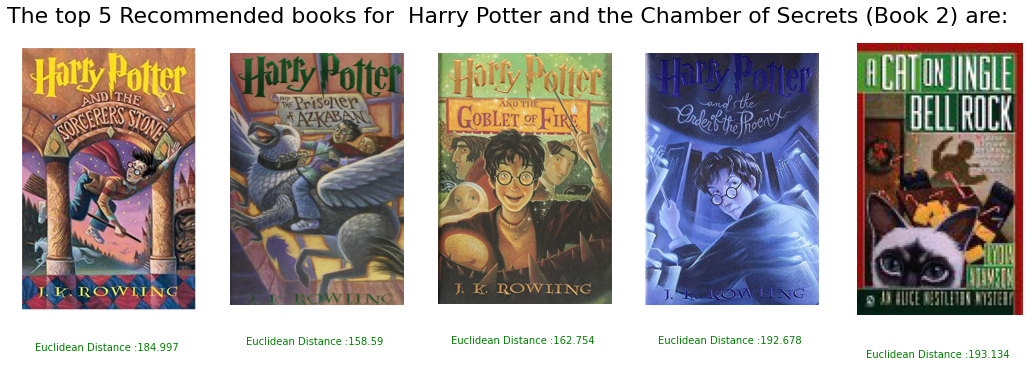

In [151]:
book_title=input('Enter the name of the book :')
aut=get_recommendations(book_title, 5)
aut=aut.drop('Book-Title',axis=1)
author_recc=pd.merge(books_df,aut,how='inner',on='ISBN')
fig, axs = plt.subplots(1,5 ,figsize=(18,5))

fig.suptitle('The top 5 Recommended books for  '+str(book_title)+' are:\n  ', size = 22)
for i in range(len(author_recc['Book-Title'].tolist())):
    url = books_df.loc[books_df['ISBN'] == author_recc['ISBN'].tolist()[i],'Image-URL-L'][:1].values[0]
    headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
}
    im = Image.open(requests.get(url,headers=headers, stream=True).raw)
    axs[i].imshow(im)
    axs[i].axis("off")
    axs[i].set_title('Euclidean Distance :{} '.format(round(author_recc['Euclidean Distance'][i],3)),
                             y=-0.18,
                                 color="green",
                                 fontsize=10)
    fig.show()


### KNN with cosine metric

In [169]:
#Creating an instance of KNN with cosine metric

model_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_cosine.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [192]:
# function to get recommendations

def get_cosine_recommendations(name, n):
    sugg=[]
    dist=[]
    # distances and indices based on similarity
    distances, indices = model_cosine.kneighbors(table.loc[name].values.reshape(1, -1), n_neighbors = n+1)
    d=list(distances[0])
    for i in range(len(distances.flatten())):
        if i==0:
            continue
        else:
            sugg.append(table.index[indices.flatten()[i]])
            dist.append(d[i])
    recc=pd.DataFrame({'Book-Title':sugg,'Similarity Score':dist})
    book_recc=pd.merge(books_df,recc,how='inner',on='Book-Title').sort_values(by='Similarity Score',ascending=True).reset_index()
    df2 = book_recc.drop_duplicates(subset=['Book-Title',], keep='first')    
    return(df2)

In [193]:
distances, indices = model_cosine.kneighbors(table.loc['Harry Potter and the Chamber of Secrets (Book 2)'].values.reshape(1, -1), n_neighbors = 6)
distances

array([[3.21964677e-15, 3.68303359e-01, 4.00616718e-01, 5.41641520e-01,
        5.88500142e-01, 5.89131318e-01]])

In [196]:
df1=get_cosine_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 5)
df1=df1[['Book-Title','Book-Author','Similarity Score']]

In [198]:
df1.to_clipboard()

Enter the name of the book :Harry Potter and the Chamber of Secrets (Book 2)


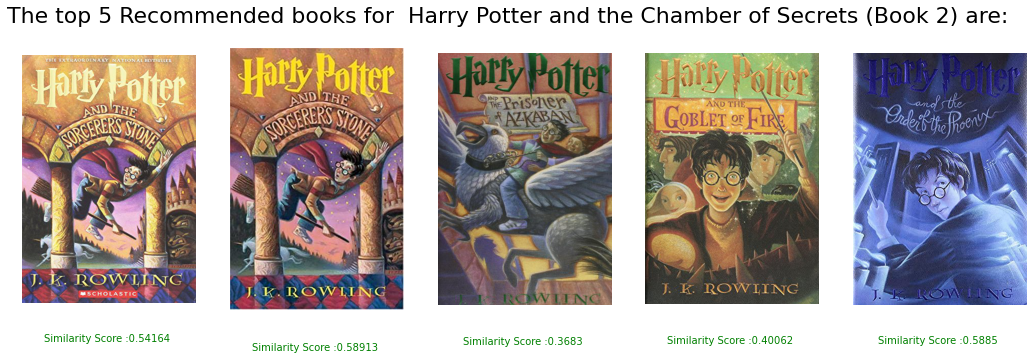

In [199]:
book_title=input('Enter the name of the book :')
aut=get_cosine_recommendations(book_title, 5)
aut=aut.drop('Book-Title',axis=1)
author_recc=pd.merge(books_df,aut,how='inner',on='ISBN')
fig, axs = plt.subplots(1,5 ,figsize=(18,5))

fig.suptitle('The top 5 Recommended books for  '+str(book_title)+' are:\n  ', size = 22)
for i in range(len(author_recc['Book-Title'].tolist())):
    url = books_df.loc[books_df['ISBN'] == author_recc['ISBN'].tolist()[i],'Image-URL-L'][:1].values[0]
    headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
}
    im = Image.open(requests.get(url,headers=headers, stream=True).raw)
    axs[i].imshow(im)
    axs[i].axis("off")
    axs[i].set_title('Similarity Score :{} '.format(round(author_recc['Similarity Score'][i],5)),
                             y=-0.18,
                                 color="green",
                                 fontsize=10)
    fig.show()


### KNN-Location based

Using KNN algorithm, clusters of similar users based on common book ratings can be found and predictions can be made using the average rating of the top-k nearest neighbors.

In [20]:
book_rating = df[['User-ID','ISBN','Book-Rating','Book-Title']]
print(book_rating.info())
print(book_rating.shape)
print(book_rating.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851385 entries, 0 to 851384
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      851385 non-null  int64 
 1   ISBN         851385 non-null  object
 2   Book-Rating  851385 non-null  int64 
 3   Book-Title   851385 non-null  object
dtypes: int64(2), object(2)
memory usage: 26.0+ MB
None
(851385, 4)
   User-ID       ISBN  Book-Rating  \
0        8    2005018            5   
1        8   60973129            8   
2        8  374157065            7   
3        8  399135782            9   
4        8  425176428            8   

                                                                                           Book-Title  
0                                                                                        Clara Callan  
1                                                                                Decision in Normandy  
2  Flu: The Story of the Grea

In [21]:
book_rating = book_rating.dropna(axis=0, subset= ['Book-Title'])
book_ratingCount = (book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating' : 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",10
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),4


In [22]:
rating_with_totalRatingCount = book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how ='left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,8,2005018,5,Clara Callan,14
1,8,60973129,8,Decision in Normandy,3
2,8,374157065,7,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,11
3,8,399135782,9,The Kitchen God's Wife,306
4,8,425176428,8,What If?: The World's Foremost Military Historians Imagine What Might Have Been,6


In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   135508.000
mean         6.283
std         21.964
min          1.000
25%          1.000
50%          2.000
75%          5.000
max       2502.000
Name: totalRatingCount, dtype: float64


In [24]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900   11.000
0.910   13.000
0.920   14.000
0.930   16.000
0.940   18.000
0.950   21.000
0.960   26.000
0.970   32.000
0.980   45.000
0.990   75.000
Name: totalRatingCount, dtype: float64


In [25]:
popularity_threshold = 75
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
3,8,399135782,9,The Kitchen God's Wife,306
15,11676,399135782,9,The Kitchen God's Wife,306
18,11676,440234743,9,The Testament,616
19,11676,452264464,8,Beloved (Plume Contemporary Fiction),180
22,11676,971880107,6,Wild Animus,2502


### Filtering to users in top 2 countries - US & Canada

In [32]:
users_df=pd.read_csv('users_cleaned.csv')

In [33]:
combined = rating_popular_book.merge(users_df, left_on ='User-ID', right_on= 'User-ID', how='left')

us_canada_user_rating = combined[combined['Country'].str.contains("USA|CANADA")]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis = 1)

us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Age_group,Country
0,8,399135782,9,The Kitchen God's Wife,306,Middle aged adults,CANADA
1569,67544,316569321,7,White Oleander : A Novel,387,Youth,CANADA
1570,67544,038082101X,8,Daughter of Fortune: A Novel,133,Youth,CANADA
1571,67544,316601950,8,The Pilot's Wife : A Novel,568,Youth,CANADA
1581,200273,006099486X,5,"The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary",111,Middle aged adults,CANADA


### Implementing KNN

In [34]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot_table(index = 'Book-Title', columns= 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [35]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [36]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i==0:
        print('Recommendations for', format(us_canada_user_rating_pivot.index[query_index]), ':')
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Sophie's World: A Novel About the History of Philosophy :
1: Miss Julia Speaks Her Mind : A Novel, with distance of 0.8930680247905021:
2: I Capture the Castle, with distance of 0.8936538816760212:
3: Schindler's List, with distance of 0.8953653957791522:
4: Snow Falling on Cedars, with distance of 0.8959534045102723:
5: The Handmaid's Tale, with distance of 0.8964824817407844:


## Memory Based Approach --(User-Item Based)

In [244]:
d1=df.copy()

In [245]:
d1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Age,Age_group,Country
0,2005018,Clara Callan,RICHARD BRUCE WRIGHT,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,16,Teens,CANADA
1,60973129,Decision in Normandy,CARLO D'ESTE,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,8,16,Teens,CANADA
2,374157065,Flu: The Story of the Great Influenza Pandemic...,GINA BARI KOLATA,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,7,16,Teens,CANADA
3,399135782,The Kitchen God's Wife,AMY TAN,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,8,9,16,Teens,CANADA
4,425176428,What If?: The World's Foremost Military Histor...,ROBERT COWLEY,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,8,8,16,Teens,CANADA


In [246]:
d1.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L', 'User-ID', 'Book-Rating', 'Age', 'Age_group', 'Country'],
      dtype='object')

In [247]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [248]:
#printing rating_explicit df
ratings_explicit=d1[['User-ID','ISBN' ,'Book-Rating']]
ratings_explicit.head()

,User-ID,ISBN,Book-Rating
0,8,2005018,5
1,8,60973129,8
2,8,374157065,7
3,8,399135782,9
4,8,425176428,8


In [249]:
#making users df who have rated books more than 99 times
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

#defining users who give more than 99 times ratings for diff-diff books becoz of runtime crash problem 
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 100 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 88080
# of users with at least 100 interactions: 1415


In [250]:
#Merging users_with_enough_interactions_df with ratings_explicit
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 100 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 851385
# of interactions from users with at least 100 interactions: 444285


In [251]:
#Checking interactions_from_selected_users_df
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating
0,254,804106304,8
1,254,316769487,10
2,254,452282152,8
3,254,60013117,9
4,254,60199563,9
5,254,60563079,9
6,254,60809027,7
7,254,61040967,8
8,254,61050474,8
9,254,61052515,9


In [252]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 444204


,ISBN,User-ID,Book-Rating
0,000104687X,23902,2.807355
1,000104799X,28204,3.000000
2,000104799X,166596,3.169925
3,000222674X,170184,3.321928
4,000223257X,30511,3.000000


In [253]:
interactions_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444204 entries, 0 to 444203
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ISBN         444204 non-null  object 
 1   User-ID      444204 non-null  int64  
 2   Book-Rating  444204 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.2+ MB


In [254]:
from sklearn.model_selection import train_test_split
#Splitting our data into train and test datasets 
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 355363
# interactions on Test set: 88841


In [255]:
#test Data
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
426022,843944021,198711,2.584963
369897,679724508,114178,2.807355
82554,307988392,21252,2.584963
406404,804108897,243930,3.169925
77819,2226120416,33145,3.169925


In [256]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,000104687X,000104799X,000222674X,000223257X,000225056X,000225414X,000225929X,000433549X,000458726X,000611962X,...,B0000T6KHI,B0000T6KIM,B0000VZEH8,B0000VZEJQ,B0000X8HIE,B00011SOXI,B0001FZGPI,B0001FZGRQ,B0001GMSV2,B0001I1KOG
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
#make pivot_matrix by values of pivot_matrix_df
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [258]:
#Making list of index of pivot_matrix_df
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[254, 507, 882, 1424, 1435, 1733, 1903, 2033, 2110, 2276]

In [259]:
#checking len of User ids
len(users_ids)

1415

In [260]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [261]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [262]:
#checking the shape
users_items_pivot_matrix.shape

(1415, 94958)

In [263]:
U.shape

(1415, 15)

In [264]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [265]:
Vt.shape

(15, 94958)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [266]:
#Making dot product of these two arrays
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 3.44380418e-03,  6.84961212e-03,  3.95452096e-05, ...,
         3.63179901e-03,  1.14095585e-03,  2.26932226e-03],
       [-5.58024564e-04,  1.74533413e-03,  7.39121306e-04, ...,
        -6.06352758e-05, -1.61819841e-05,  2.29491817e-04],
       [ 1.74463756e-03,  3.99539059e-03,  2.00888925e-04, ...,
         1.89789505e-03,  5.87013199e-04,  1.02265283e-03],
       ...,
       [-2.37069592e-04,  2.86680292e-03,  3.26232694e-04, ...,
        -9.46794385e-04, -6.65560865e-05, -1.08612946e-03],
       [-3.47390056e-04,  1.16716548e-03,  1.51843465e-04, ...,
        -2.40008779e-04,  7.36076787e-05, -2.94791148e-04],
       [-1.58632719e-03,  2.65166204e-02, -1.14349107e-02, ...,
        -2.09841994e-04,  3.78411242e-03, -2.71791162e-04]])

In [267]:
#Checking shape
all_user_predicted_ratings.shape

(1415, 94958)

In [268]:
#Printing pivot_matrix df
users_items_pivot_matrix_df

ISBN,000104687X,000104799X,000222674X,000223257X,000225056X,000225414X,000225929X,000433549X,000458726X,000611962X,...,B0000T6KHI,B0000T6KIM,B0000VZEH8,B0000VZEJQ,B0000X8HIE,B00011SOXI,B0001FZGPI,B0001FZGRQ,B0001GMSV2,B0001I1KOG
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
#Checking shape
all_user_predicted_ratings.shape

(1415, 94958)

In [270]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,274549,274808,275020,275970,276680,277427,277478,277639,278188,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
000104687X,0.003444,-0.000558,0.001745,0.001007,0.000942,-0.000126,0.001263,0.001238,0.000723,0.000229,...,0.000684,0.001837,0.000829,0.010438,0.001269,0.003317,0.000777,-0.000237,-0.000347,-0.001586
000104799X,0.006850,0.001745,0.003995,0.001841,0.003605,0.000575,0.002218,0.002145,0.001739,0.003625,...,0.003833,0.004753,0.001452,0.018180,0.003000,0.012380,0.002226,0.002867,0.001167,0.026517
000222674X,0.000040,0.000739,0.000201,0.000100,0.000544,-0.000145,0.000028,0.000149,-0.000213,0.000941,...,0.000423,0.000233,0.000100,0.001250,0.000372,0.002348,0.000187,0.000326,0.000152,-0.011435
000223257X,0.001851,0.000055,0.000821,0.000658,0.000324,-0.000279,0.000678,0.000258,0.000190,-0.000281,...,0.000057,0.001278,0.000651,0.008572,0.001286,0.002032,0.000189,-0.000743,-0.000374,-0.006289
000225056X,0.003035,-0.000212,0.001149,0.000574,0.000570,0.000317,0.001428,0.002109,0.000817,0.001845,...,0.000698,0.000747,0.000660,0.005571,-0.000068,0.003279,0.000780,0.000300,-0.000185,0.001690


In [271]:
#checking shape
cf_preds_df.shape

(94958, 1415)

In [272]:
#Checking len of preds_df
len(cf_preds_df.columns)

1415

In [273]:
# Checking the head of our books df
books=books_df
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,195153448,Classical Mythology,MARK P. O. MORFORD,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,RICHARD BRUCE WRIGHT,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,CARLO D'ESTE,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,GINA BARI KOLATA,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. BARBER,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [274]:
#Creating class for collaborative filtering recommendation
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        # self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')[['ISBN', 'Book-Title','recStrength']]


        # if verbose:
        #     if self.items_df is None:
        #         raise Exception('"items_df" is required in verbose mode')

        #     recommendations_df = recommendations_df.merge(self.items_df, how = 'inner', 
        #                                                   left_on = 'ISBN', 
        #                                                   right_on = 'ISBN')[['ISBN', 'Book-Author', 'Book-Title', 'Year-Of-Publication', 'Publisher','recStrength']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df)

In [275]:
#Indexing by User-ID to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [276]:
#Making a small function for getting rated item of any user
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [291]:
#Making a class for getting recommendation of a paerticular users
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(5))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return



        

model_recommender = ModelRecommender()    

In [301]:
#Making a class for getting recommendation of a paerticular users
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(5))
        reco=person_recs_df.head(5)
        reco=reco[['ISBN','recStrength']]
        author_recc=pd.merge(books_df,reco,how='inner',on='ISBN')
        fig, axs = plt.subplots(1,5 ,figsize=(18,5))

        fig.suptitle('The top 5 Recommended books for User ID: '+str(person_id)+' are:\n  ', size = 22)
        for i in range(len(author_recc['Book-Title'].tolist())):
            url = books_df.loc[books_df['ISBN'] == author_recc['ISBN'].tolist()[i],'Image-URL-L'][:1].values[0]
            headers ={
            'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
        }
            im = Image.open(requests.get(url,headers=headers, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")
            axs[i].set_title('recStrength :{} '.format(round(author_recc['recStrength'][i],5)),
                                     y=-0.18,
                                         color="green",
                                         fontsize=10)
            fig.show()



        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return



        

model_recommender = ModelRecommender()    


In [292]:
#CHecking len
len(interactions_full_indexed_df.index.values)

444204

In [293]:
#Making a list of index which is user ids now
print(list(interactions_full_indexed_df.index.values)[0:10])

[23902, 28204, 166596, 170184, 30511, 101851, 180651, 272225, 11676, 36836]


In [294]:
# Let's recommend books to User-Id 69078 and see the results.

Recommendation for User-ID =  69078
        ISBN                                         Book-Title  recStrength
0  312195516                The Red Tent (Bestselling Backlist)     0.904644
1   60928336    Divine Secrets of the Ya-Ya Sisterhood: A Novel     0.853586
2  446672211  Where the Heart Is (Oprah's Book Club (Paperba...     0.774157
3  375727345                              House of Sand and Fog     0.768660
4  142001740                            The Secret Life of Bees     0.764796


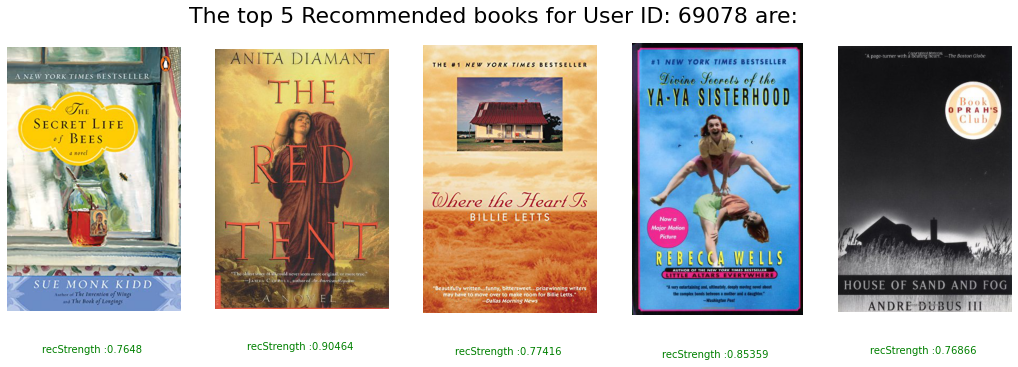

In [302]:
# user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,69078)

### Evaluation

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set

This evaluation method works as follows:

For each user

    For each item the user has interacted in test set
    Sample 100 other items the user has never interacted.
    Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
    Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
Aggregate the global Top-N accuracy metrics

In [89]:
#Making class for evaluation on the basis of Top-N Metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    
     

In [90]:
#Lets evaluate our results and see how our recommendation system work
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1414 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.45124435789781747, 'recall@10': 0.5645816683738364}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
9,391,565,2045,0.191,0.276,11676
26,259,342,1145,0.226,0.299,98391
68,216,295,872,0.248,0.338,153662
28,261,348,831,0.314,0.419,35859
0,214,288,637,0.336,0.452,198711
39,242,307,514,0.471,0.597,76352
183,174,205,467,0.373,0.439,16795
243,111,154,431,0.258,0.357,235105
236,162,209,411,0.394,0.509,204864
85,84,116,397,0.212,0.292,212898


In [91]:
cf_detailed_results_df.head(20)

,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
9,391,565,2045,0.191,0.276,11676
26,259,342,1145,0.226,0.299,98391
68,216,295,872,0.248,0.338,153662
28,261,348,831,0.314,0.419,35859
0,214,288,637,0.336,0.452,198711
39,242,307,514,0.471,0.597,76352
183,174,205,467,0.373,0.439,16795
243,111,154,431,0.258,0.357,235105
236,162,209,411,0.394,0.509,204864
85,84,116,397,0.212,0.292,212898


In [95]:
cf_detailed_results_df.describe()

,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
count,1415.000,1415.000,1415.000,1415.000,1415.000,1415.000
mean,28.331,35.447,62.785,0.468,0.578,140408.827
std,31.953,40.945,91.411,0.174,0.182,79439.750
min,0.000,0.000,20.000,0.000,0.000,254.000
25%,11.000,14.000,26.000,0.361,0.478,73295.000
50%,18.000,22.000,37.000,0.478,0.600,140358.000
75%,32.000,40.000,64.000,0.591,0.709,209266.500
max,391.000,565.000,2045.000,0.931,1.000,278418.000
